<p><br>
<center>
<b><h1>ALY6140 : Analytics System Technology</h1></b>
<b><h2>Northeastern University</h2></b>
<b><h2>Professor Daya Rudhramoorthi </h2></b>
<b><h2>Group 1 - Bhavik Bhosale, Sneha Rokkam</h2></b>
<b><h2>Capstone Group Project</h2></b>
<b><h2>Boston Property Assesment</h2></b>
</center>
</p>

## Import Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.2f}'.format


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Read the Dataset

In [56]:
assesment_data = pd.read_csv("PropertyAssesments.csv")
assesment_data.head(5)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,OWNER MAIL ADDRESS,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,RC_UNITS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,ROOF_COVER,INT_WALL,EXT_FNISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,BDRM_COND,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_TYPE,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000,104.00,PUTNAM ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RE - Row End,Y,PASCUCCI CARLO,"195 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3353.00,2202.00,195700,588500,784200,8422.31,1900.00,NaN,NaN,F - Flat,C - Composition,N - Normal,A - Asbestos,A - Average,F - Fair,A - Average,6.00,3.00,0.00,3.00,12.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,3.00,A - Average,NaN
1,100002000,NaN,100002000,197.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,Y,SEMBRANO RODERICK,"197 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3299.00,2307.00,196500,615300,811800,8718.73,1920.00,2000.00,NaN,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,3.00,3.00,0.00,3.00,9.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,M - Modern,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.00,NaN,0.00,A - Average,NaN
2,100003000,NaN,100003000,199.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,GUERRA CHEVARRIA ANA S,"199 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3392.00,2268.00,197100,599200,796300,8552.26,1905.00,1985.00,NaN,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,G - Good,A - Average,5.00,3.00,0.00,3.00,13.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
3,100004000,NaN,100004000,201.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,"MADDALENI JAMES E, TS","PO BOX 557 #, EVERETT, MA 02149",3.00,NaN,NaN,NaN,NaN,1150.00,3108.00,2028.00,197700,530200,727900,7817.65,1900.00,1991.00,NaN,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,5.00,3.00,0.00,3.00,11.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
4,100005000,NaN,100005000,203.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,104,R2,TWO-FAM DWELLING,RE - Row End,Y,MARKS TRAVIS JOSEPH,"203 Lexington ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,2010.00,3700.00,2546.00,225700,569100,794800,8536.15,1900.00,1978.00,NaN,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,6.00,3.00,0.00,2.00,13.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,2F - 2 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN


In [57]:
assesment_data.shape

(180627, 60)

In [58]:
assesment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180627 entries, 0 to 180626
Data columns (total 60 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PID                 180627 non-null  int64  
 1   CM_ID               91160 non-null   float64
 2   GIS_ID              180627 non-null  int64  
 3   ST_NUM              171096 non-null  float64
 4   ST_NAME             180627 non-null  object 
 5   UNIT_NUM            80672 non-null   object 
 6   CITY                180622 non-null  object 
 7   ZIP_CODE            180624 non-null  float64
 8   BLDG_SEQ            180626 non-null  float64
 9   NUM_BLDGS           180627 non-null  int64  
 10  LUC                 180627 non-null  int64  
 11  LU                  180627 non-null  object 
 12  LU_DESC             180627 non-null  object 
 13  BLDG_TYPE           178101 non-null  object 
 14  OWN_OCC             180627 non-null  object 
 15  OWNER               180627 non-nul

## Data Preprocessing

In [59]:
#Check for Duplicates
duplicates_in_data = assesment_data[assesment_data.duplicated(['PID'])]
print(f"The duplicates found in the PID column:{duplicates_in_data.count()}")

The duplicates found in the PID column:PID                   179
CM_ID                   2
GIS_ID                179
ST_NUM                176
ST_NAME               179
UNIT_NUM                1
CITY                  178
ZIP_CODE              179
BLDG_SEQ              179
NUM_BLDGS             179
LUC                   179
LU                    179
LU_DESC               179
BLDG_TYPE             179
OWN_OCC               179
OWNER                 179
OWNER MAIL ADDRESS    179
RES_FLOOR             178
CD_FLOOR                1
RES_UNITS               1
COM_UNITS               0
RC_UNITS                0
LAND_SF               179
GROSS_AREA            178
LIVING_AREA           178
LAND_VALUE            179
BLDG_VALUE            179
TOTAL_VALUE           179
GROSS_TAX             179
YR_BUILT              179
YR_REMODEL             68
STRUCTURE_CLASS         4
ROOF_STRUCTURE        179
ROOF_COVER            179
INT_WALL              177
EXT_FNISHED           179
INT_COND              178

In [60]:
#Drop the duplicates
# drop duplicates in 'PID' in the original DataFrame
assesment_data.drop_duplicates(subset='PID', keep='last', inplace=True)

In [61]:
#Check weather all duplicates have been removed
duplicates_in_data = assesment_data[assesment_data.duplicated(['PID'])]
print(f"The duplicates found in the PID column:{duplicates_in_data.count()}")

The duplicates found in the PID column:PID                   0
CM_ID                 0
GIS_ID                0
ST_NUM                0
ST_NAME               0
UNIT_NUM              0
CITY                  0
ZIP_CODE              0
BLDG_SEQ              0
NUM_BLDGS             0
LUC                   0
LU                    0
LU_DESC               0
BLDG_TYPE             0
OWN_OCC               0
OWNER                 0
OWNER MAIL ADDRESS    0
RES_FLOOR             0
CD_FLOOR              0
RES_UNITS             0
COM_UNITS             0
RC_UNITS              0
LAND_SF               0
GROSS_AREA            0
LIVING_AREA           0
LAND_VALUE            0
BLDG_VALUE            0
TOTAL_VALUE           0
GROSS_TAX             0
YR_BUILT              0
YR_REMODEL            0
STRUCTURE_CLASS       0
ROOF_STRUCTURE        0
ROOF_COVER            0
INT_WALL              0
EXT_FNISHED           0
INT_COND              0
EXT_COND              0
OVERALL_COND          0
BED_RMS               0
F

In [62]:
# Count total missing values at each column in DataFrame
missing_values_count = assesment_data.isnull().sum()

# Calculate percentage of missing values at each column in DataFrame
missing_values_percentage = (assesment_data.isnull().sum() / len(assesment_data)) * 100

# Create a new DataFrame with the column name, missing value count and missing value percentage
missing_data_df = pd.DataFrame({
    'Missing Value Count': missing_values_count,
    'Missing Value Percentage': missing_values_percentage
})

# Format the 'Missing Value Percentage' column as a percentage with 2 decimal places
missing_data_df['Missing Value Percentage'] = missing_data_df['Missing Value Percentage'].apply(lambda x: f'{x:.2f}%')

print(missing_data_df)

                    Missing Value Count Missing Value Percentage
PID                                   0                    0.00%
CM_ID                             89290                   49.48%
GIS_ID                                0                    0.00%
ST_NUM                             9528                    5.28%
ST_NAME                               0                    0.00%
UNIT_NUM                          99777                   55.29%
CITY                                  4                    0.00%
ZIP_CODE                              3                    0.00%
BLDG_SEQ                              1                    0.00%
NUM_BLDGS                             0                    0.00%
LUC                                   0                    0.00%
LU                                    0                    0.00%
LU_DESC                               0                    0.00%
BLDG_TYPE                          2526                    1.40%
OWN_OCC                  

### Drop Unwanted Columns

In [73]:
#List out unwanted columns
unwanted_columns = ['PID',
                    'CM_ID',
                    'GIS_ID',
                    'ST_NUM',
                    'ST_NAME',
                    'UNIT_NUM',
                    'LUC',
                    'LU',
                    'LU_DESC',
                    'OWNER MAIL ADDRESS',
                    'RES_FLOOR',
                    'RES_UNITS',
                    'COM_UNITS',
                    'LAND_SF',
                    'LAND_VALUE',
                    'YR_REMODEL',
                    'STRUCTURE_CLASS',
                    'ROOF_STRUCTURE',
                    'ROOF_COVER',
                    'RC_UNITS',
                    'INT_WALL',
                    'INT_COND',
                    'BED_RMS',
                    'FULL_BTH',
                    'HLF_BTH',
                    'BDRM_COND',
                    'BTHRM_STYLE1',
                    'BTHRM_STYLE2',
                    'BTHRM_STYLE3',
                    'KITCHEN_STYLE1',
                    'KITCHEN_STYLE2',
                    'KITCHEN_STYLE3',
                    'HEAT_FUEL',
                    'FIREPLACES',
                    'NUM_PARKING',
                    'PROP_VIEW',
                    'CORNER_UNIT',
                    'OVERALL_COND',
                    'ORIENTATION',
                    'CD_FLOOR'
                   ]

# Drop these rows from dataFrame
property_data = assesment_data.drop(unwanted_columns, inplace = False, axis='columns')

In [74]:
property_data.head(5)

,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,BLDG_TYPE,OWN_OCC,OWNER,GROSS_AREA,LIVING_AREA,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,EXT_FNISHED,EXT_COND,KITCHENS,TT_RMS,KITCHEN_TYPE,HEAT_TYPE,AC_TYPE
0,EAST BOSTON,2128.00,1.00,1,RE - Row End,Y,PASCUCCI CARLO,3353.00,2202.00,588500,784200,8422.31,1900.00,A - Asbestos,F - Fair,3.00,12.00,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None
1,EAST BOSTON,2128.00,1.00,1,RM - Row Middle,Y,SEMBRANO RODERICK,3299.00,2307.00,615300,811800,8718.73,1920.00,M - Vinyl,A - Average,3.00,9.00,3F - 3 Full Eat In Kitchens,F - Forced Hot Air,C - Central AC
2,EAST BOSTON,2128.00,1.00,1,RM - Row Middle,N,GUERRA CHEVARRIA ANA S,3392.00,2268.00,599200,796300,8552.26,1905.00,M - Vinyl,G - Good,3.00,13.00,3F - 3 Full Eat In Kitchens,S - Space Heat,N - None
3,EAST BOSTON,2128.00,1.00,1,RM - Row Middle,N,"MADDALENI JAMES E, TS",3108.00,2028.00,530200,727900,7817.65,1900.00,M - Vinyl,A - Average,3.00,11.00,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None
4,EAST BOSTON,2128.00,1.00,1,RE - Row End,Y,MARKS TRAVIS JOSEPH,3700.00,2546.00,569100,794800,8536.15,1900.00,M - Vinyl,A - Average,2.00,13.00,2F - 2 Full Eat In Kitchens,W - Ht Water/Steam,N - None


In [75]:
# Check the percentage and count of the missing data 
for col in property_data.columns:
    missing_count = sum(property_data[col].isnull())
    missing_percentage = round(np.mean(property_data[col].isnull()) * 100, 2)
    print('{:<15s}\t: {:<5d}\t: {:<5.2f}%'.format(col, missing_count, missing_percentage))


CITY           	: 4    	: 0.00 %
ZIP_CODE       	: 3    	: 0.00 %
BLDG_SEQ       	: 1    	: 0.00 %
NUM_BLDGS      	: 0    	: 0.00 %
BLDG_TYPE      	: 2526 	: 1.40 %
OWN_OCC        	: 0    	: 0.00 %
OWNER          	: 0    	: 0.00 %
GROSS_AREA     	: 34632	: 19.19%
LIVING_AREA    	: 34922	: 19.35%
BLDG_VALUE     	: 0    	: 0.00 %
TOTAL_VALUE    	: 0    	: 0.00 %
GROSS_TAX      	: 0    	: 0.00 %
YR_BUILT       	: 22930	: 12.71%
EXT_FNISHED    	: 23021	: 12.76%
EXT_COND       	: 36383	: 20.16%
KITCHENS       	: 11113	: 6.16 %
TT_RMS         	: 48350	: 26.79%
KITCHEN_TYPE   	: 48114	: 26.66%
HEAT_TYPE      	: 47844	: 26.51%
AC_TYPE        	: 47858	: 26.52%


In [76]:
property_data.dropna(subset=['AC_TYPE'],inplace=True)

In [77]:
# Check the percentage and count of the missing data 

def print_missing_value_summary(df):
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{:<15s} : {:<5d} \t: {:.2f}%'.format(col, sum(df[col].isnull()), round(pct_missing * 100, 2)))

print_missing_value_summary(property_data)


CITY            : 1     	: 0.00%
ZIP_CODE        : 0     	: 0.00%
BLDG_SEQ        : 0     	: 0.00%
NUM_BLDGS       : 0     	: 0.00%
BLDG_TYPE       : 0     	: 0.00%
OWN_OCC         : 0     	: 0.00%
OWNER           : 0     	: 0.00%
GROSS_AREA      : 427   	: 0.32%
LIVING_AREA     : 453   	: 0.34%
BLDG_VALUE      : 0     	: 0.00%
TOTAL_VALUE     : 0     	: 0.00%
GROSS_TAX       : 0     	: 0.00%
YR_BUILT        : 60    	: 0.05%
EXT_FNISHED     : 0     	: 0.00%
EXT_COND        : 6     	: 0.00%
KITCHENS        : 448   	: 0.34%
TT_RMS          : 508   	: 0.38%
KITCHEN_TYPE    : 466   	: 0.35%
HEAT_TYPE       : 5     	: 0.00%
AC_TYPE         : 0     	: 0.00%


### Dropping Rows with Nulls

In [78]:
# Droping the rows with null values.

property_data.dropna(inplace=True)


In [79]:
# Check the percentage and count of the missing data 

def print_missing_value_summary(df):
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{:<15s} : {:<5d} \t: {:.2f}%'.format(col, sum(df[col].isnull()), round(pct_missing * 100, 2)))

print_missing_value_summary(property_data)

CITY            : 0     	: 0.00%
ZIP_CODE        : 0     	: 0.00%
BLDG_SEQ        : 0     	: 0.00%
NUM_BLDGS       : 0     	: 0.00%
BLDG_TYPE       : 0     	: 0.00%
OWN_OCC         : 0     	: 0.00%
OWNER           : 0     	: 0.00%
GROSS_AREA      : 0     	: 0.00%
LIVING_AREA     : 0     	: 0.00%
BLDG_VALUE      : 0     	: 0.00%
TOTAL_VALUE     : 0     	: 0.00%
GROSS_TAX       : 0     	: 0.00%
YR_BUILT        : 0     	: 0.00%
EXT_FNISHED     : 0     	: 0.00%
EXT_COND        : 0     	: 0.00%
KITCHENS        : 0     	: 0.00%
TT_RMS          : 0     	: 0.00%
KITCHEN_TYPE    : 0     	: 0.00%
HEAT_TYPE       : 0     	: 0.00%
AC_TYPE         : 0     	: 0.00%


In [80]:
property_data.shape

(131990, 20)

### Categorical Variables 

In [86]:
columns = ['CITY', 'NUM_BLDGS', 'BLDG_TYPE', 'YR_BUILT', 'EXT_COND', 'TT_RMS',
           'KITCHEN_TYPE', 'HEAT_TYPE', 'AC_TYPE']

for col in columns:
    print("# # # # #  {}  # # # # #".format(col))
    display(property_data[col].value_counts())


# # # # #  CITY  # # # # #


BOSTON              31381
DORCHESTER          21769
SOUTH BOSTON        10874
BRIGHTON             9897
JAMAICA PLAIN        9074
WEST ROXBURY         8824
ROSLINDALE           7488
HYDE PARK            7439
EAST BOSTON          7192
CHARLESTOWN          5222
MATTAPAN             3759
ROXBURY              3570
ALLSTON              3384
ROXBURY CROSSING     1129
CHESTNUT HILL         967
BROOKLINE              16
DEDHAM                  4
NEWTON                  1
Name: CITY, dtype: int64

# # # # #  NUM_BLDGS  # # # # #


1    131805
2       171
3         9
4         3
5         2
Name: NUM_BLDGS, dtype: int64

# # # # #  BLDG_TYPE  # # # # #


CL - Colonial                         16749
RM - Row Middle                       15228
LR - Low Rise                         14108
MR - Mid Rise                         13383
CV - Conventional                     12918
DK - Decker                           12695
FS - Free Standing                     9630
RE - Row End                           7418
HR - High Rise                         7174
TF - Two Fam Stack                     6132
SD - Semi-Det                          4290
CP - Cape                              3700
TH - Town House                        2449
RN - Ranch                             1916
DX - Duplex                            1614
BW - Bungalow                          1086
RR - Raised Ranch                       840
VT - Victorian                          249
SL - Split Level                        209
CN - Contemporary                        79
TD - Tudor                               77
TL - Tri-Level                           29
111 - APT 4-6 UNITS             

# # # # #  YR_BUILT  # # # # #


1900.00    15513
1910.00     9952
1920.00     9840
1905.00     9222
1890.00     8274
           ...  
1806.00        1
1823.00        1
1819.00        1
1792.00        1
1803.00        1
Name: YR_BUILT, Length: 235, dtype: int64

# # # # #  EXT_COND  # # # # #


A - Average      74474
G - Good         48338
E - Excellent     6980
F - Fair          2139
P - Poor            59
Name: EXT_COND, dtype: int64

# # # # #  TT_RMS  # # # # #


4.00     23580
5.00     18413
3.00     15750
6.00     15399
7.00     10455
8.00      7437
10.00     5717
12.00     5161
9.00      4848
15.00     4655
2.00      4643
11.00     4292
14.00     3197
18.00     2377
13.00     2325
17.00     1302
16.00      981
1.00       699
20.00      581
19.00      178
Name: TT_RMS, dtype: int64

# # # # #  KITCHEN_TYPE  # # # # #


O - One Person                 43789
1F - 1 Full Eat In Kitchens    29420
F - Full Eat In                24017
2F - 2 Full Eat In Kitchens    16980
3F - 3 Full Eat In Kitchens    12237
P - Pullman                     2745
0F - 0 Full Eat In Kitchens     2655
N - None                         115
4F - 4 Full Eat In Kitchens       31
5F - 5 Full Eat In Kitchens        1
Name: KITCHEN_TYPE, dtype: int64

# # # # #  HEAT_TYPE  # # # # #


W - Ht Water/Steam    71299
F - Forced Hot Air    49401
E - Electric           5884
P - Heat Pump          4616
S - Space Heat          664
N - None                 87
O - Other                39
Name: HEAT_TYPE, dtype: int64

# # # # #  AC_TYPE  # # # # #


N - None           79116
C - Central AC     51749
D - Ductless AC     1125
Name: AC_TYPE, dtype: int64

### Summary Statistics

In [90]:
numerical_columns = property_data.select_dtypes(include=['int64', 'float64']).columns
property_data[numerical_columns].describe(datetime_is_numeric=True)

,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,GROSS_AREA,LIVING_AREA,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,KITCHENS,TT_RMS
count,131990.00,131990.00,131990.00,131990.00,131990.00,131990.00,131990.00,131990.00,131990.00,131990.00,131990.00
mean,2130.72,1.00,1.00,2376.30,1700.93,713007.86,838112.39,8979.34,1930.88,1.35,6.96
std,33.42,0.03,0.04,1786.86,1086.70,728180.80,803640.07,8638.34,66.54,0.66,4.02
min,2026.00,1.00,1.00,90.00,90.00,3100.00,33400.00,0.00,1700.00,0.00,1.00
25%,2121.00,1.00,1.00,923.00,905.00,400800.00,491300.00,5265.02,1900.00,1.00,4.00
50%,2127.00,1.00,1.00,1815.00,1378.10,545100.00,663000.00,7110.95,1918.00,1.00,6.00
75%,2132.00,1.00,1.00,3487.00,2264.95,768200.00,915100.00,9814.21,1960.00,1.00,9.00
max,2467.00,4.00,5.00,71312.00,71312.00,33790900.00,33790900.00,362914.27,20198.00,5.00,20.00


### EDA 

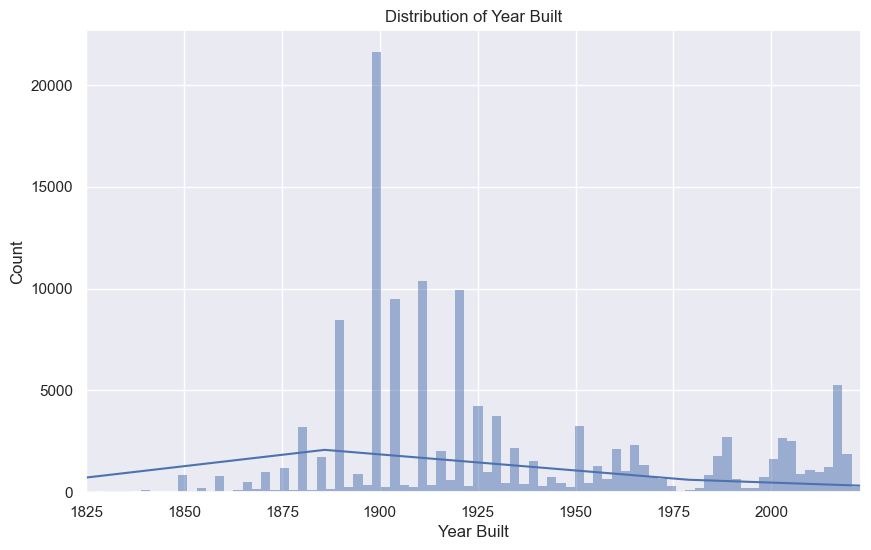

In [103]:
#Distribution of Year Built
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['YR_BUILT'], kde=True)
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.title('Distribution of Year Built')
plt.xlim(1825, 2023)  # Set x-axis limits 
plt.show()

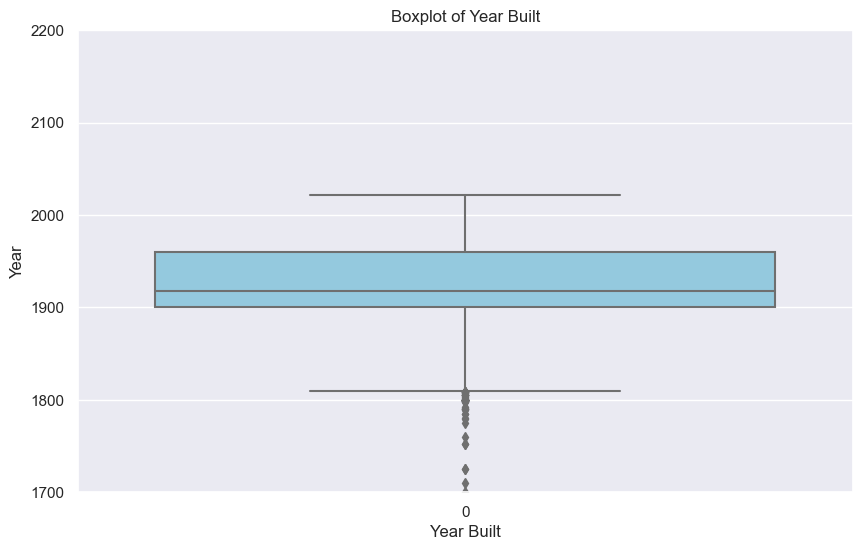

In [118]:
#Boxplot to check outliers of Year Built
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=property_data['YR_BUILT'], color='skyblue')
plt.xlabel('Year Built')
plt.ylabel('Year')
plt.title('Boxplot of Year Built')
plt.ylim(1700, 2200) 
plt.show()

<AxesSubplot:>

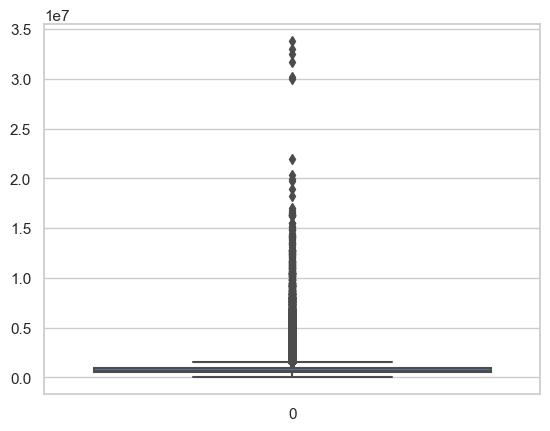

In [120]:
# sns.set(style="whitegrid")
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=property_data['TOTAL_VALUE'], color='skyblue', showfliers=False)
# plt.xlabel('Total Value')
# plt.ylabel('Value')
# plt.title('Boxplot of Total Value')
# plt.xticks(rotation=45) 
# plt.show()

sns.boxplot(data=property_data['TOTAL_VALUE'])

### Handle Outliers 

In [124]:
#Display outliers in TOTAL_VALUE
filtered_data = property_data.loc[property_data['TOTAL_VALUE'] > 2100000, 'TOTAL_VALUE']
filtered_data

10766     2113200
10768     2138000
10785     2350600
10796     3059500
10797     2418600
           ...   
178958    2120600
179066    2805800
179312    2848700
179313    2619400
179750    2241900
Name: TOTAL_VALUE, Length: 4974, dtype: int64

In [129]:
#Drop the outliers 
property_data = property_data[property_data['TOTAL_VALUE'] <= 2000000]
value_counts = property_data['TOTAL_VALUE'].value_counts()

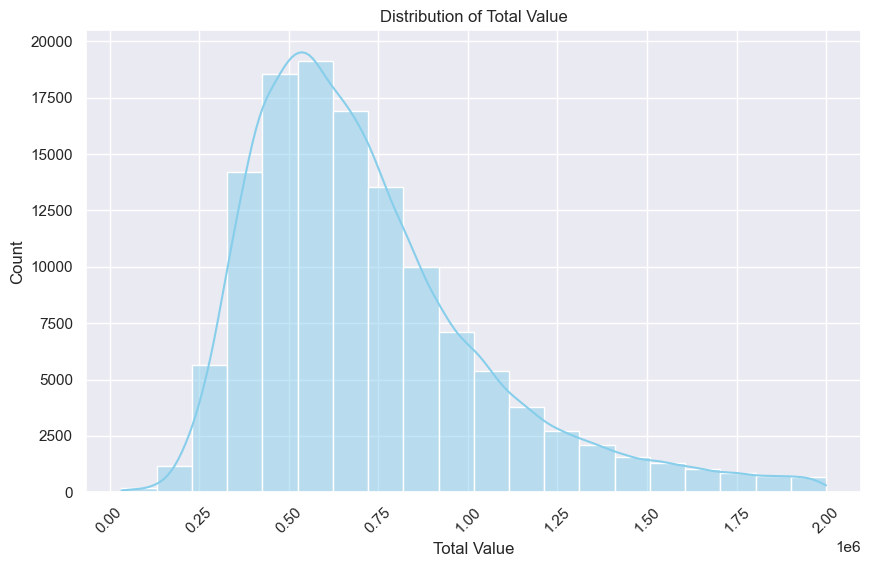

In [132]:
#Distribution of TOTAL_VALUE
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['TOTAL_VALUE'], kde=True, color='skyblue', bins=20)
plt.xlabel('Total Value')
plt.ylabel('Count')
plt.title('Distribution of Total Value')
plt.xticks(rotation=45)
plt.show()

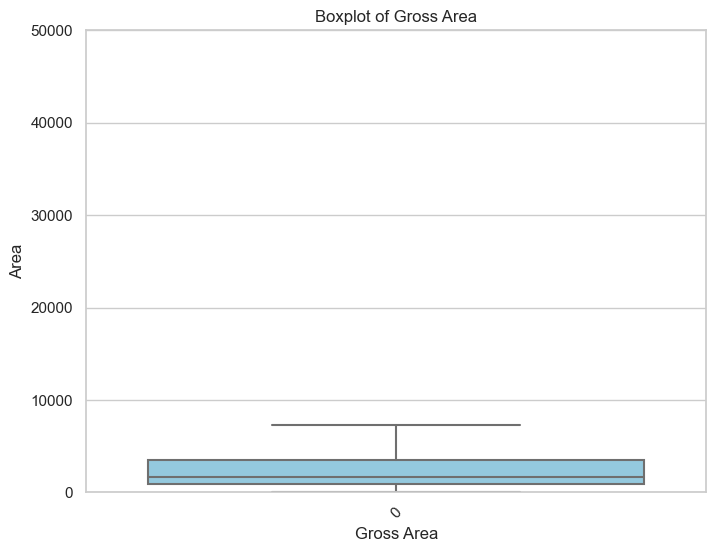

In [139]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=property_data['GROSS_AREA'], color='skyblue', showfliers=False)
plt.xlabel('Gross Area')
plt.ylabel('Area')
plt.title('Boxplot of Gross Area')
plt.xticks(rotation=45)
plt.ylim(0, 50000) 
plt.show()

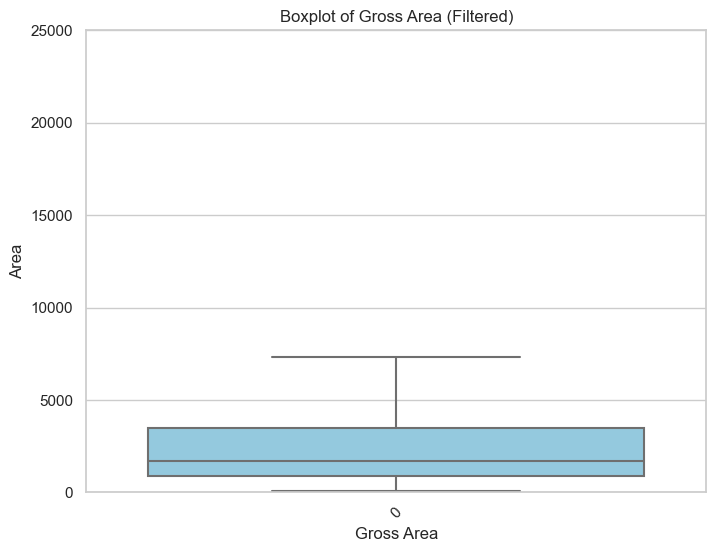

In [142]:
## Removing outliars in GROSS_AREA that is values above 25000
filtered_data = property_data[property_data['GROSS_AREA'] < 25000]['GROSS_AREA']

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data, color='skyblue', showfliers=False)
plt.xlabel('Gross Area')
plt.ylabel('Area')
plt.title('Boxplot of Gross Area (Filtered)')
plt.xticks(rotation=45)
plt.ylim(0, 25000) 
plt.show()

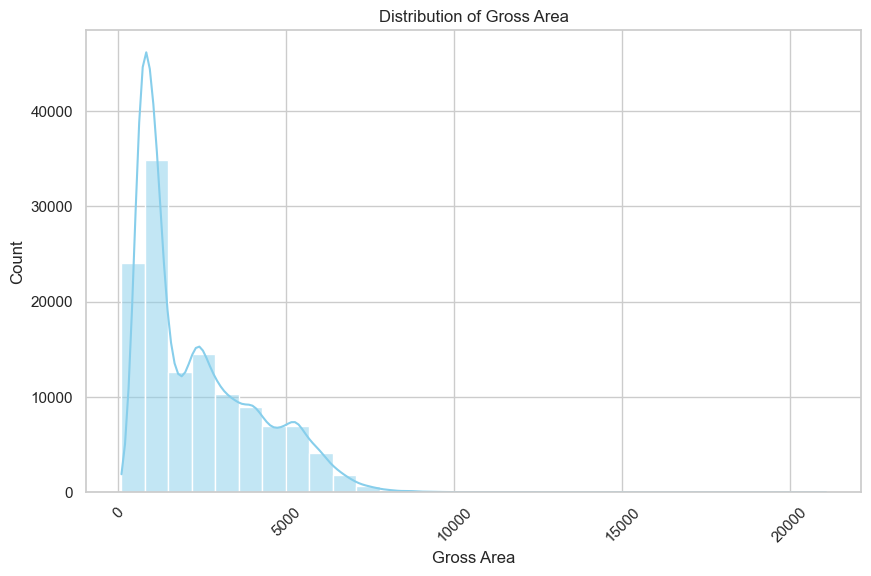

In [143]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['GROSS_AREA'], kde=True, color='skyblue', bins=30)
plt.xlabel('Gross Area')
plt.ylabel('Count')
plt.title('Distribution of Gross Area')
plt.xticks(rotation=45)
plt.show()

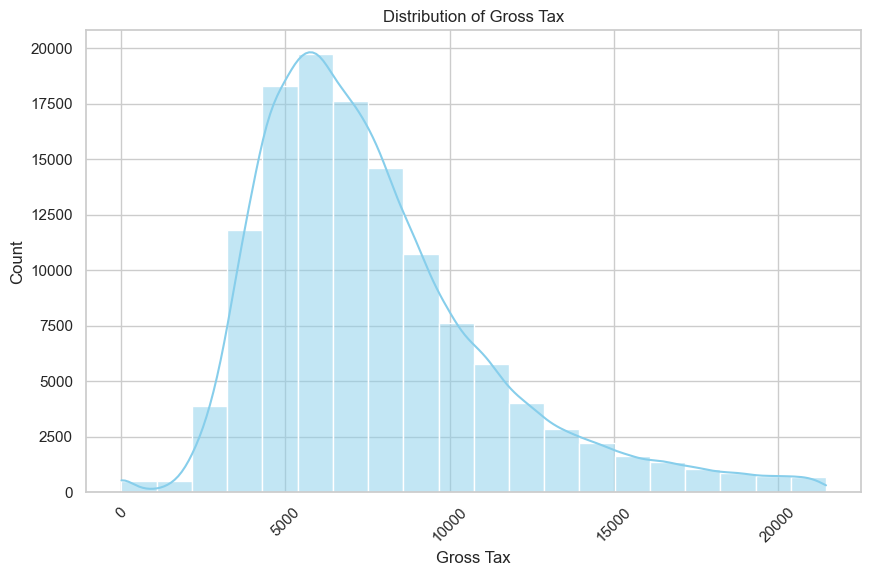

In [144]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['GROSS_TAX'], kde=True, color='skyblue', bins=20)
plt.xlabel('Gross Tax')
plt.ylabel('Count')
plt.title('Distribution of Gross Tax')
plt.xticks(rotation=45)
plt.show()